In [141]:
# import
import jax.numpy as jnp
import pandas as pd
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.fft import fft, ifft, fftfreq
import numpy as np

In [142]:
# Get Data
X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
Y_train = pd.read_csv('../data/Y_train.csv')

In [143]:
# Let's see what we have
X_train

,DELIVERY_START,load_forecast,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price
0,2022-01-01 02:00:00+01:00,49439.0,3386.0,11487.0,44118.0,3035.0,0.0,79.248348,0.000000,NaN
1,2022-01-01 03:00:00+01:00,46511.0,3386.0,11487.0,44118.0,3143.0,0.0,61.776532,0.000000,NaN
2,2022-01-01 04:00:00+01:00,45158.0,3386.0,11487.0,44118.0,3288.0,0.0,44.291112,0.000000,NaN
3,2022-01-01 05:00:00+01:00,44779.0,3386.0,11487.0,44118.0,3447.0,0.0,36.127588,0.000000,NaN
4,2022-01-01 06:00:00+01:00,45284.0,3386.0,11487.0,44118.0,3679.0,0.0,30.983023,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
10600,2023-03-29 19:00:00+02:00,50814.0,3386.0,11952.0,38320.0,7552.0,651.0,247.408490,7.821622,108.11
10601,2023-03-29 20:00:00+02:00,50628.0,3386.0,11952.0,38320.0,8338.0,109.0,155.795012,2.534054,125.66
10602,2023-03-29 21:00:00+02:00,48201.0,3386.0,11952.0,38320.0,9115.0,0.0,126.884684,0.000000,138.01
10603,2023-03-29 22:00:00+02:00,47967.0,3386.0,11952.0,38320.0,9636.0,0.0,156.669189,0.000000,136.74


In [144]:
X_test

,DELIVERY_START,load_forecast,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price
0,2023-04-02 00:00:00+02:00,45814.0,3386.0,10902.0,36705.0,6359.0,0.0,56.764535,0.0,NaN
1,2023-04-02 01:00:00+02:00,44084.0,3386.0,10902.0,36705.0,6469.0,0.0,54.262133,0.0,NaN
2,2023-04-02 02:00:00+02:00,43281.0,3386.0,10902.0,36705.0,6511.0,0.0,78.105928,0.0,NaN
3,2023-04-02 03:00:00+02:00,40825.0,3386.0,10902.0,36705.0,6628.0,0.0,78.187557,0.0,NaN
4,2023-04-02 04:00:00+02:00,39181.0,3386.0,10902.0,36705.0,6700.0,0.0,96.765484,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
4937,2023-10-24 19:00:00+02:00,49686.0,2226.0,11749.0,42980.0,4901.0,0.0,247.887323,0.0,125.67
4938,2023-10-24 20:00:00+02:00,53397.0,2226.0,11749.0,42980.0,5584.0,0.0,343.192642,0.0,139.58
4939,2023-10-24 21:00:00+02:00,50586.0,2226.0,11749.0,42980.0,6306.0,0.0,471.875973,0.0,147.93
4940,2023-10-24 22:00:00+02:00,46777.0,2226.0,11749.0,42980.0,6959.0,0.0,595.528100,0.0,122.20


In [145]:
Y_train

,DELIVERY_START,spot_id_delta
0,2022-01-01 02:00:00+01:00,-36.874770
1,2022-01-01 03:00:00+01:00,-12.643588
2,2022-01-01 04:00:00+01:00,-1.950193
3,2022-01-01 05:00:00+01:00,1.938272
4,2022-01-01 06:00:00+01:00,0.199907
...,...,...
10600,2023-03-29 19:00:00+02:00,6.029303
10601,2023-03-29 20:00:00+02:00,13.576177
10602,2023-03-29 21:00:00+02:00,17.478945
10603,2023-03-29 22:00:00+02:00,17.559407


In [146]:
# Let's see how many values and features do we have
print(f"features: {X_train.shape[1]}")
print(f"size: {X_train.shape[0]}")

# Let's see how many values and features do we have
print(f"features: {X_test.shape[1]}")
print(f"size: {X_test.shape[0]}")

features: 10
size: 10605
features: 10
size: 4942


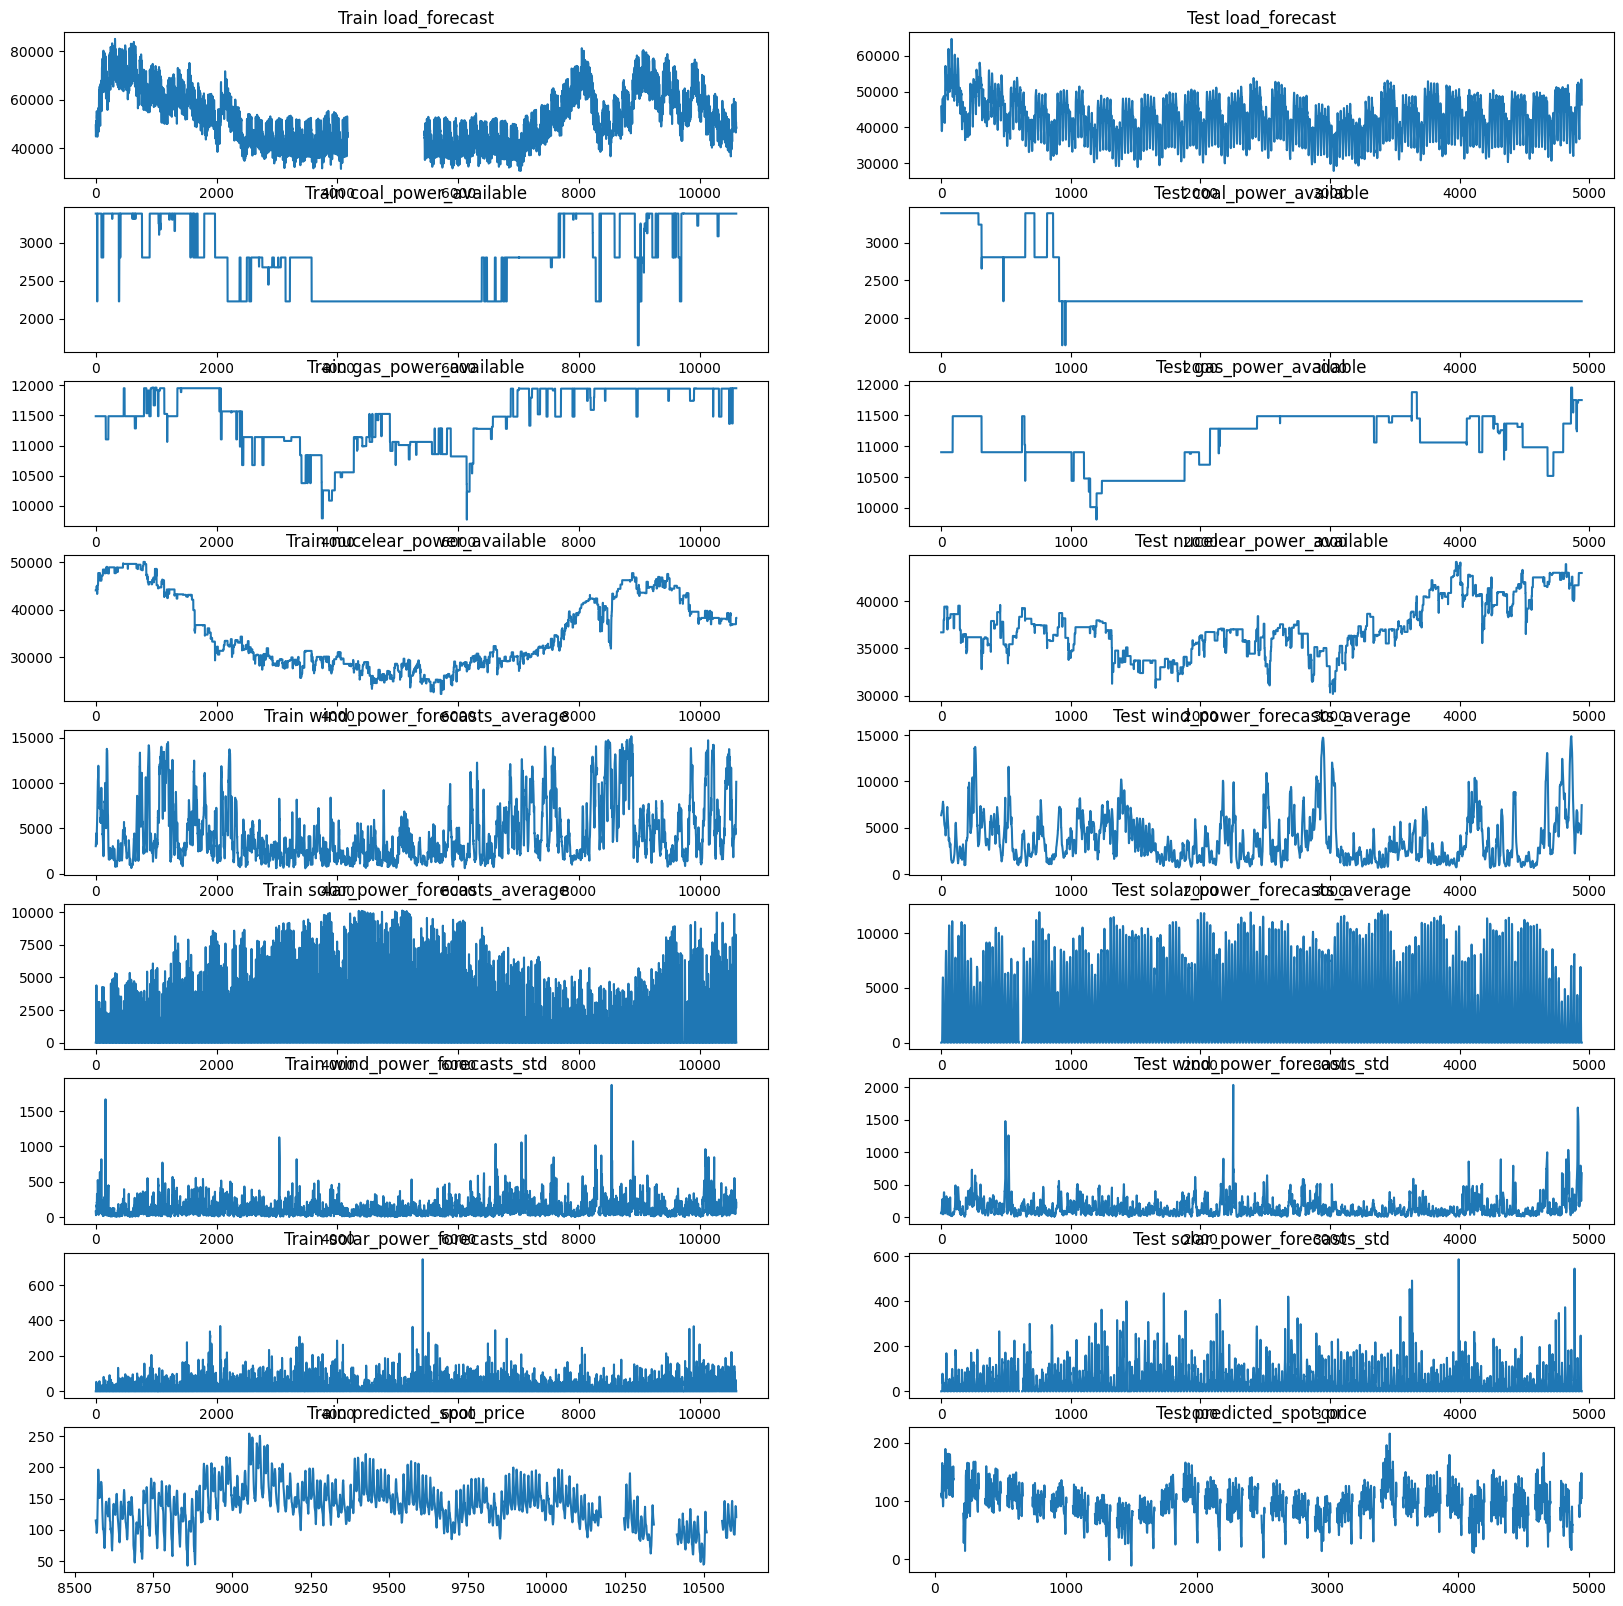

In [147]:
import matplotlib.pyplot as plt

# Get the column names of X_train and X_test
hours_train = [(int(X_train["DELIVERY_START"].iloc[i][11:13]) + 1 ) % 24 for i in range(len(X_train["DELIVERY_START"]))]
months_train = [int(X_train["DELIVERY_START"].iloc[i][5:7]) for i in range(len(X_train["DELIVERY_START"]))]
hours_test = [(int(X_test["DELIVERY_START"].iloc[i][11:13]) + 1 ) % 24 for i in range(len(X_test["DELIVERY_START"]))]
months_test = [int(X_test["DELIVERY_START"].iloc[i][5:7]) for i in range(len(X_test["DELIVERY_START"]))]

X_train = X_train.drop(columns=["DELIVERY_START"])
X_test = X_test.drop(columns=["DELIVERY_START"])

train_columns = X_train.columns
test_columns = X_test.columns

# Create a figure with subplots
fig, axs = plt.subplots(len(train_columns), 2, figsize=(20, 20))

# Loop over the columns
for i, column in enumerate(train_columns):
    # Plot the train data
    axs[i, 0].plot(np.array(X_train[column]))
    axs[i, 0].set_title(f'Train {column}')
    # Plot the test data
    axs[i, 1].plot(np.array(X_test[column]))
    axs[i, 1].set_title(f'Test {column}')

# Show the plot
plt.show()



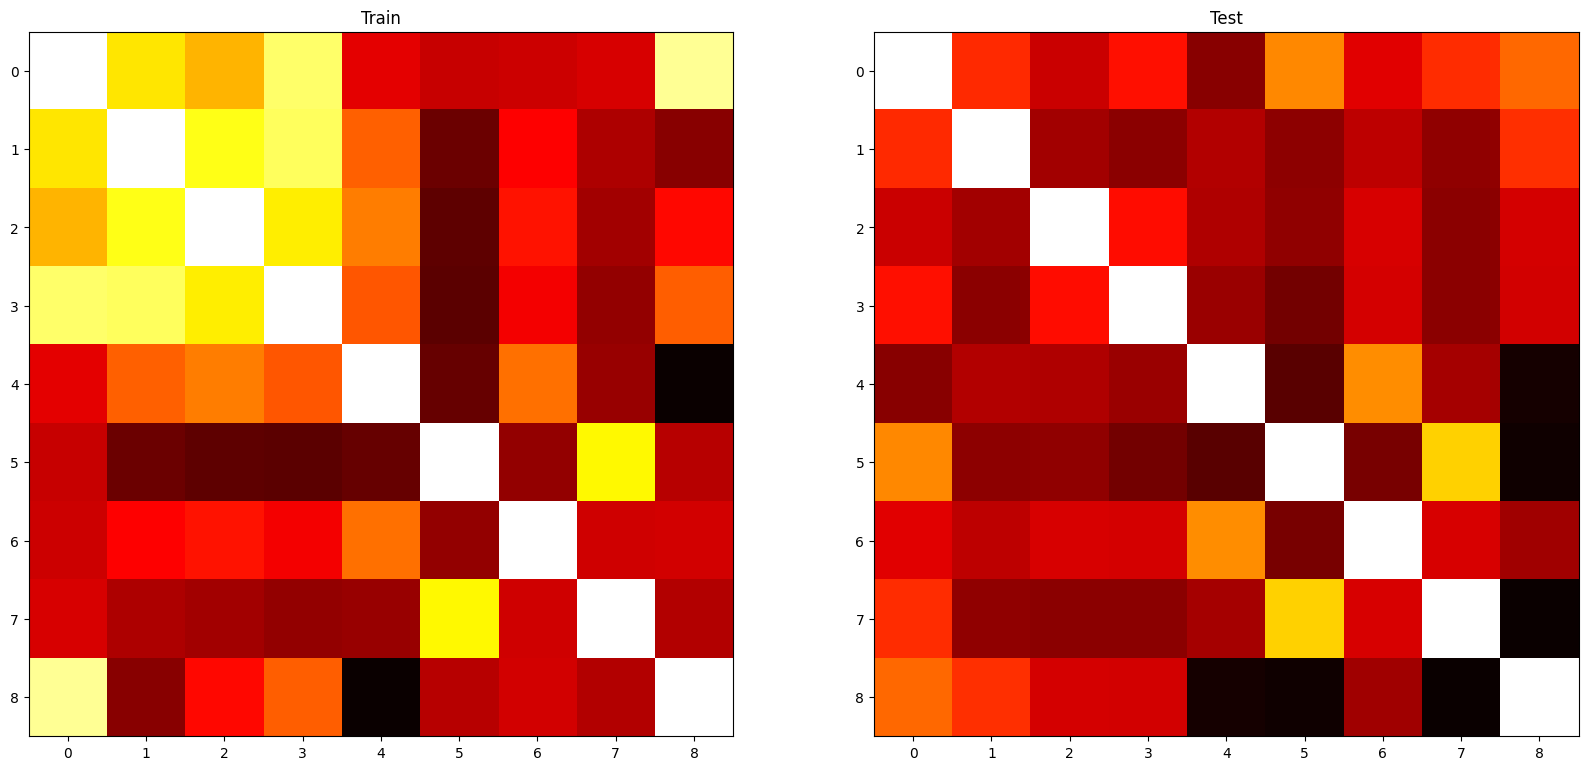

In [148]:
# I want intercorrelation between the signals for X_train and X_test with heatmap

# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Plot the heatmap for X_train
corr_train = X_train.corr()
axs[0].imshow(corr_train, cmap='hot', interpolation='nearest')
axs[0].set_title('Train')

# Plot the heatmap for X_test
corr_test = X_test.corr()
axs[1].imshow(corr_test, cmap='hot', interpolation='nearest')
axs[1].set_title('Test')

# Show the plot
plt.show()



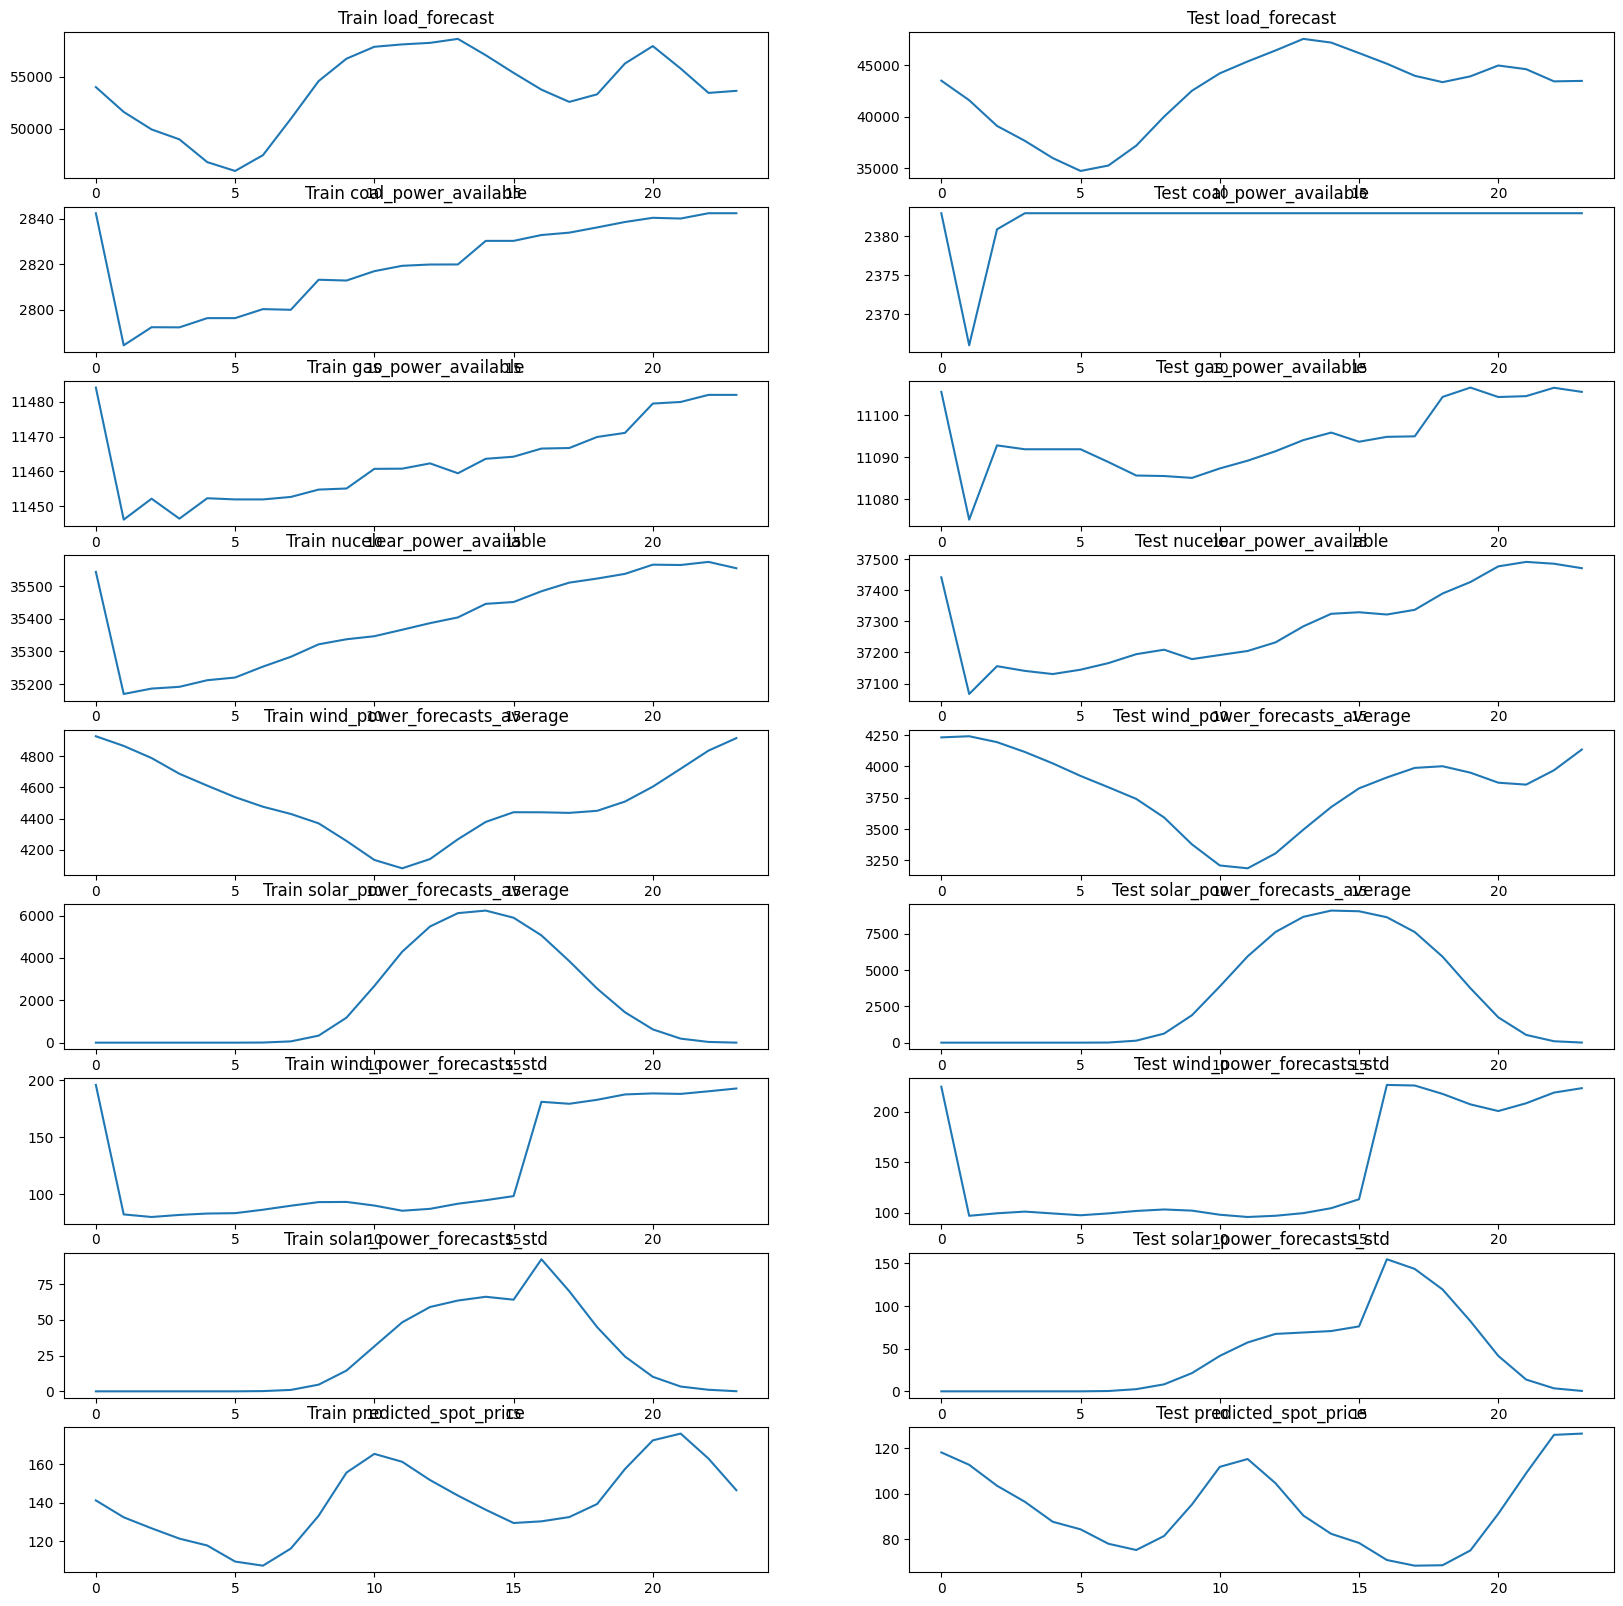

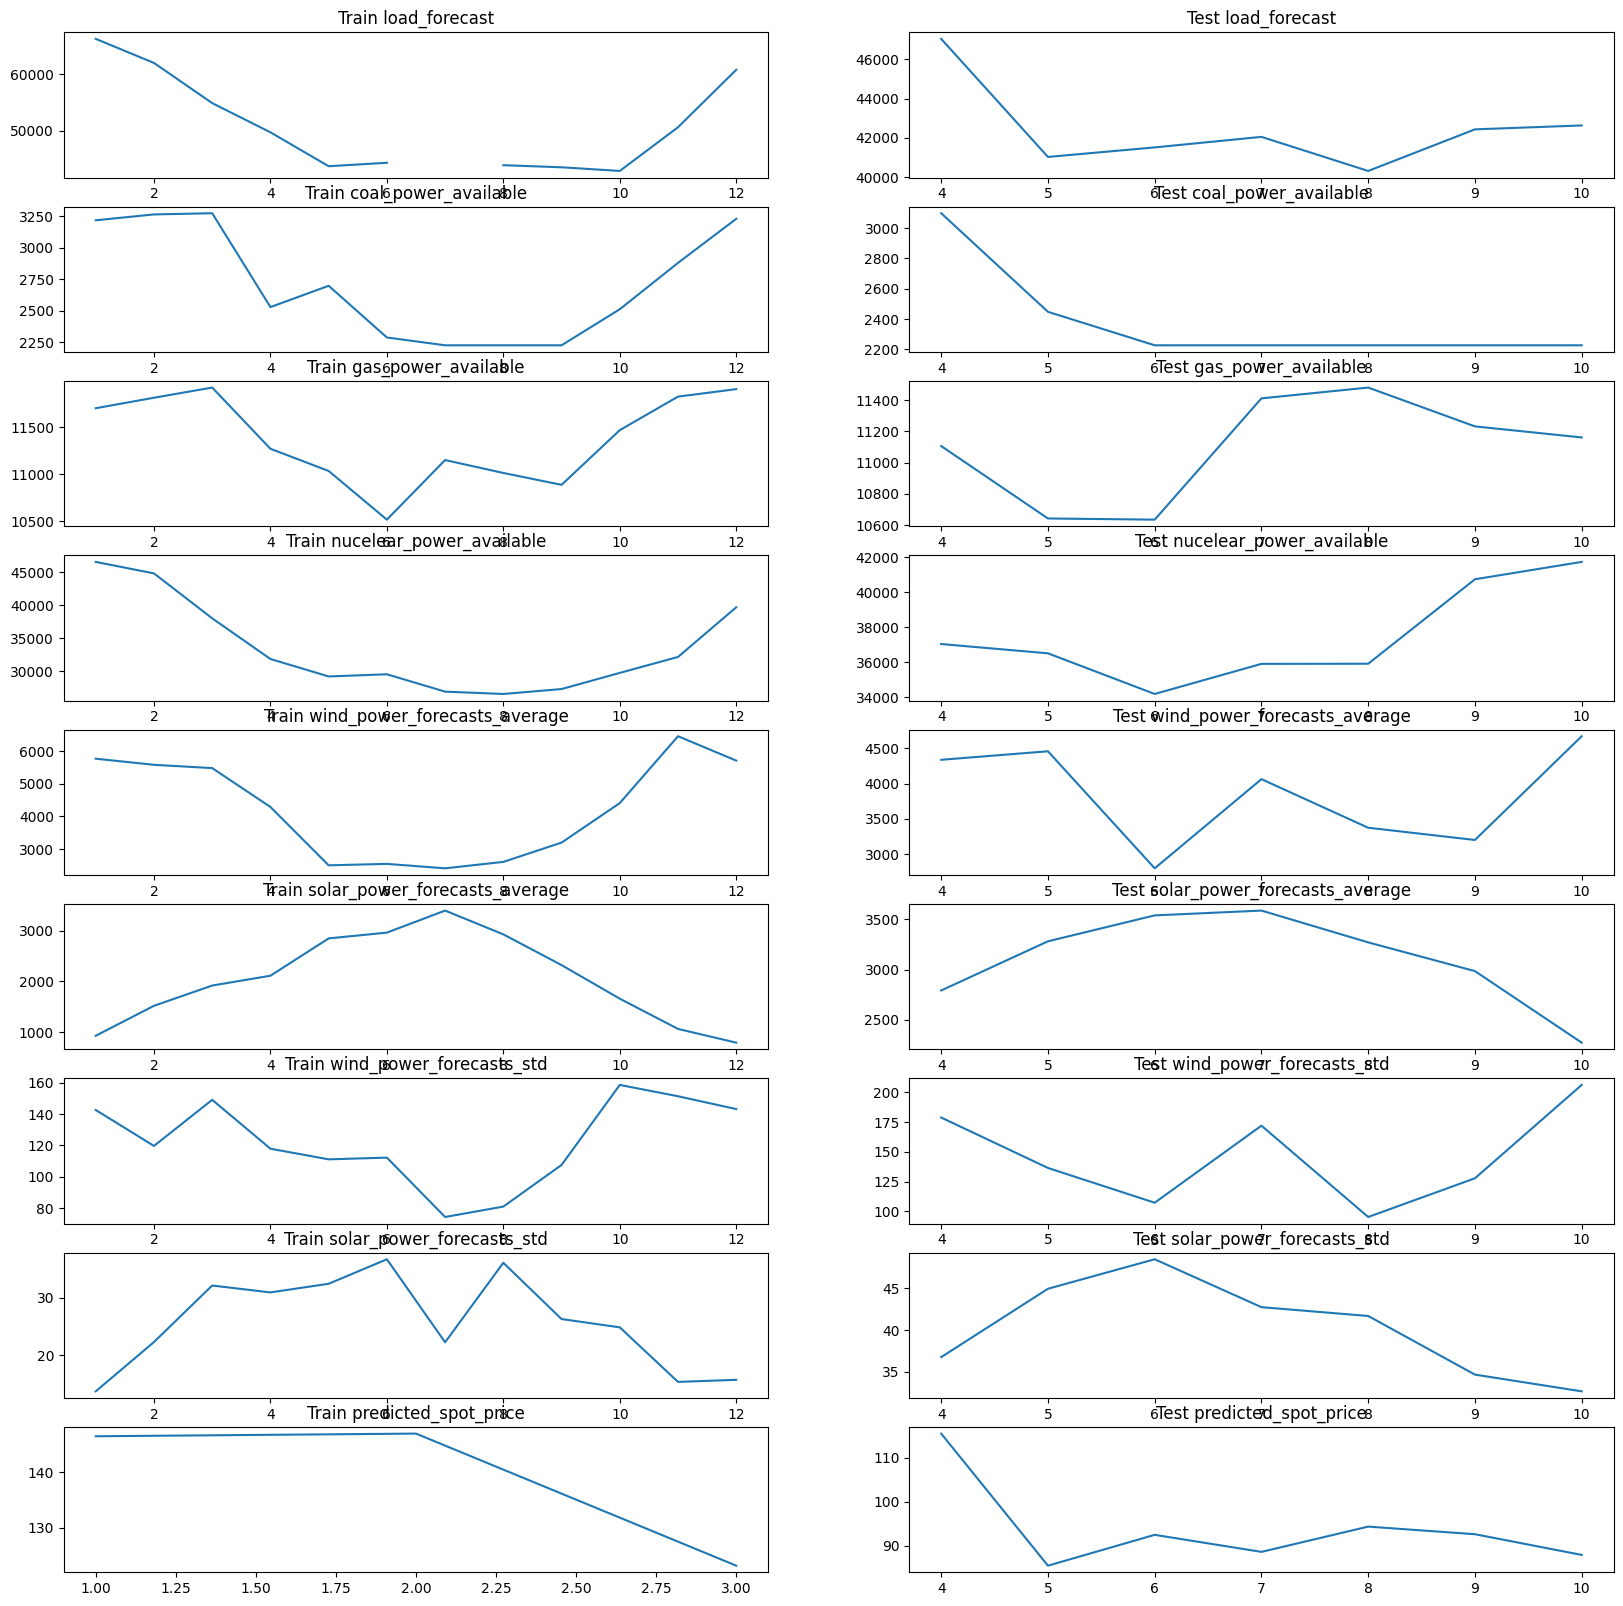

In [149]:
# I want now to revisualise the data but with a mean per hours and per months for X_train and X_test

# Create a figure with subplots
fig, axs = plt.subplots(len(train_columns), 2, figsize=(20, 20))

X_train["hours"] = hours_train
X_train["months"] = months_train
X_test["hours"] = hours_test
X_test["months"] = months_test

# Loop over the columns
for i, column in enumerate(train_columns):
    # Plot the train data
    axs[i, 0].plot(X_train.groupby('hours')[column].mean())
    axs[i, 0].set_title(f'Train {column}')
    # Plot the test data
    axs[i, 1].plot(X_test.groupby('hours')[column].mean())
    axs[i, 1].set_title(f'Test {column}')

# Show the plot
plt.show()

# Create a figure with subplots
fig, axs = plt.subplots(len(train_columns), 2, figsize=(20, 20))

# Loop over the columns
for i, column in enumerate(train_columns):
    # Plot the train data
    axs[i, 0].plot(X_train.groupby('months')[column].mean())
    axs[i, 0].set_title(f'Train {column}')
    # Plot the test data
    axs[i, 1].plot(X_test.groupby('months')[column].mean())
    axs[i, 1].set_title(f'Test {column}')

# Show the plot
plt.show()
